In [22]:
# 载入必要的函数库
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import Model
from keras.layers import Dense,Flatten,Input
from keras.optimizers import SGD,RMSprop,Adam
from keras.models import Sequential # 导入models模块中的Sequential容器

from keras.utils import to_categorical 

In [20]:
## 载入mnist数据集
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data() 

## 转换为one - hot型向量
Y_train=to_categorical(y_train)
Y_test=to_categorical(y_test)

print(Y_train.shape)
print(Y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [23]:
'''
 实验：构建 Multi-layer Nueral Network 模型 
'''

##  第一步  创建模型结构 ##

IMSIZE = 28                                               
"""
input_layer = Input([IMSIZE,IMSIZE])       # MNIST图像为28*28的单层图片
x = input_layer                              
x = Flatten()(input_layer)                   # 将28*28*1的Tensor拉直为784维向量
x = Dense(1000,activation = 'relu')(x)       # 全连接到1000个节点，并采用relu激活函数
x = Dense(10,activation = 'softmax')(x)      # 全连接到10个节点，并采用softmax激活函数转化为(0,1)取值
output_layer=x
model=Model(input_layer,output_layer)    # Model函数将input_layer 和 output_layer中间的部分连接起来
"""
model = Sequential([Input([IMSIZE,IMSIZE]),Flatten(),Dense(1000,activation='relu'),Dense(10,activation='softmax')]) # 使用sequential容器配置训练模型
model.summary()

##  第二步  模型编译 ##

model.compile(loss='categorical_crossentropy',optimizer=SGD(lr=0.001),metrics=['accuracy'])

##  第三步  模型拟合 ##

history1 = model.fit(X_train,Y_train, validation_data=(X_test,Y_test), batch_size=1000, epochs=50)

# 第四部  提取loss指标
# model.fit会返回一个history对象，里面记录了训练集和测试集的loss以及acc
# 我们将这些指标取出，绘制折线图

train_loss1 = history1.history["loss"]

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_5 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
60/60 [==============================] - 4s 73ms/step - loss: 22.0076 - accuracy: 0.8123 - val_loss: 2.7461 - val_accuracy: 0.8975
Epoch 2/50
60/60 [==============================] - 4s 70ms/step - loss: 2.0617 - accuracy: 0.9091 - val_loss: 1.9415 - val_accuracy: 0.9164
Epoch 3/50
60/60 [==============================] - 4s 71ms/step - loss: 1.4302 - accuracy: 0.925

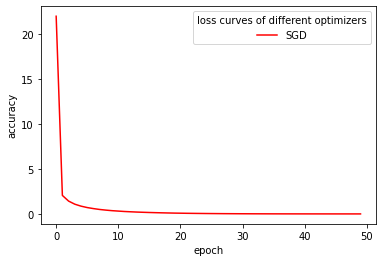

In [24]:
x = np.arange(50) # 生成0:49的连续整数代表epoch
y = train_loss1 # 将history对象的loss属性命名为y
plt.plot(x,y,color='red',label='SGD') # 绘制x-y散点图并用红色平滑曲线连接，图例为SGD
plt.legend(title='loss curves of different optimizers') # 设置图例标题为不同优化器下的损失曲线
plt.xlabel('epoch') # 设置横轴表示epoch
plt.ylabel('accuracy') # 设置纵轴表示accuracy
plt.show() # 绘制图像

In [29]:
from keras.models import Sequential # 导入models模块中的Sequential容器

optim_list = ['SGD','RMSprop','Adagrad','Adadelta','Adam','Adamax','Nadam'] # 新建一个列表来存储所有优化器的名称
color_list = ['red','orange','yellow','green','blue','purple','grey'] # 新建一个列表来储存不同优化器对应损失曲线的颜色

for i in range(7): # 生成0:6的连续整数代表7种优化器的下标
  print('Optimizer:') # 输出当前模型使用的优化器名称
  print(optim_list[i])
  IMSIZE = 28 # 设置输入图像的长宽为28像素
  """                                               
  input_layer = Input([IMSIZE,IMSIZE])       # MNIST图像为28*28的单层图片
  x = input_layer                              
  x = Flatten()(input_layer)                   # 将28*28*1的Tensor拉直为784维向量
  x = Dense(1000,activation = 'relu')(x)       # 全连接到1000个节点，并采用relu激活函数
  x = Dense(10,activation = 'softmax')(x)      # 全连接到10个节点，并采用softmax激活函数转化为(0,1)取值
  output_layer=x
  model = Model(input_layer,output_layer)    # Model函数将input_layer 和 output_layer中间的部分连接起来
  """
  model = Sequential([Input([IMSIZE,IMSIZE]),Flatten(),Dense(1000,activation='relu'),Dense(10,activation='softmax')]) # 使用sequential容器配置训练模型
  model.summary() #　输出模型信息

  model.compile(loss='categorical_crossentropy',optimizer=optim_list[i],metrics=['accuracy']) # 模型编译，损失函数为交叉熵，优化器为优化器列表中的下标为i的优化器，性能度量指标为accuracy准确率

  trained_model = model.fit(X_train,Y_train, validation_data=(X_test,Y_test), batch_size=1000, epochs=50) # 训练模型，每批1000张图，一共50批
  x = np.arange(50) # 生成0:49的连续整数代表epoch　
  y = trained_model.history["loss"] # 将history对象的loss属性命名为y
  plt.plot(x,y,color=color_list[i],label=optim_list[i])# 绘制当前优化器下的损失曲线，并设置对应的图例
  plt.legend(title='loss curves of different optimizers') # 设定图片标题
plt.xlabel('epoch') #　设置横坐标为epoch
plt.ylabel('accuracy') # 设置纵坐标为accuracy
plt.show() # 绘制图像


Optimizer:
SGD
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 1000)              785000    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
60/60 [==============================] - 4s 73ms/step - loss: 682.2188 - accuracy: 0.6188 - val_loss: 0.6291 - val_accuracy: 0.8392
Epoch 2/50
10/60 [====>.........................] - ETA: 2s - loss: 0.5710 - accuracy: 0.8479

KeyboardInterrupt: ignored